In [11]:
#import wget
#
#municipios_endpoint = "https://gaia.inegi.org.mx/wscatgeo/geo/mgem"
#
#for s in [str(i).zfill(2) for i in range(1, 33)]:
#    response = wget.download(f"{municipios_endpoint}/{s}", f"../temp/municipios_raw_jsons/")

In [14]:
import json

municipios_db = []

for s in [str(i).zfill(2) for i in range(1, 33)]:

    with open(f"../temp/municipios_raw_jsons/{s}") as f:

        current_json_ds = json.load(f)

        features = current_json_ds["features"]

        for feat in features:

            f_aux = {}
            f_aux["cve_geo"] = (feat["properties"]).get("cvegeo")
            f_aux["cve_agee"] = (feat["properties"]).get("cve_agee")
            f_aux["cve_agem"] = (feat["properties"]).get("cve_agem")
            f_aux["nom_agem"] = (feat["properties"]).get("nom_agem")

            f_aux["crs"] = (feat["geometry"]["crs"]["properties"]).get("name")
            f_aux["geometry"] = json.dumps(feat["geometry"], ensure_ascii=True)

            municipios_db.append(f_aux)
        #end

In [18]:
municipios_db[0]

{'cve_geo': '01008',
 'cve_agee': '01',
 'cve_agem': '008',
 'nom_agem': 'San José de Gracia',
 'crs': 'EPSG:6365',
 'geometry': '{"type": "MultiPolygon", "crs": {"type": "name", "properties": {"name": "EPSG:6365"}}, "coordinates": [[[[-102.4561096, 22.32323225], [-102.45536551, 22.31212203], [-102.45500665, 22.31209272], [-102.45011795, 22.28804968], [-102.45161705, 22.28711192], [-102.45319054, 22.28623134], [-102.45335718, 22.28623652], [-102.45507037, 22.28628983], [-102.45652563, 22.28633508], [-102.45590474, 22.28447992], [-102.45638938, 22.28238195], [-102.45675789, 22.28081983], [-102.45707963, 22.27903926], [-102.4580134, 22.27796268], [-102.45677808, 22.27717806], [-102.45522912, 22.27688452], [-102.45569466, 22.27468468], [-102.45315362, 22.27395011], [-102.45232526, 22.27367528], [-102.45220345, 22.27363486], [-102.45128402, 22.26244617], [-102.44477665, 22.27130131], [-102.44193494, 22.27301372], [-102.44191786, 22.24216457], [-102.44436005, 22.2426238], [-102.44376769, 22

In [19]:
import pandas as pd

municipios_df = pd.DataFrame(municipios_db)

In [20]:
municipios_df

,cve_geo,cve_agee,cve_agem,nom_agem,crs,geometry
0,01008,01,008,San José de Gracia,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
1,01009,01,009,Tepezalá,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2,01010,01,010,El Llano,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
3,01011,01,011,San Francisco de los Romo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
4,01001,01,001,Aguascalientes,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
...,...,...,...,...,...,...
2470,32041,32,041,El Salvador,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2471,32058,32,058,Santa María de la Paz,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2472,32045,32,045,Tepechitlán,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2473,32046,32,046,Tepetongo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."


In [21]:
municipios_df.to_parquet(f"{os.environ['ZM_CATALOG']}", index=False)

In [22]:
import duckdb
duck = duckdb.connect()

In [23]:
retrieved_zm_catalog = duck.sql(f"""
SELECT *
FROM read_parquet('{os.environ['ZM_CATALOG']}')
""").df()

In [24]:
retrieved_zm_catalog

,cve_geo,cve_agee,cve_agem,nom_agem,crs,geometry
0,01008,01,008,San José de Gracia,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
1,01009,01,009,Tepezalá,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2,01010,01,010,El Llano,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
3,01011,01,011,San Francisco de los Romo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
4,01001,01,001,Aguascalientes,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
...,...,...,...,...,...,...
2470,32041,32,041,El Salvador,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2471,32058,32,058,Santa María de la Paz,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2472,32045,32,045,Tepechitlán,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."
2473,32046,32,046,Tepetongo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name..."


In [53]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [49]:
zm_catalog = duck.sql(f"""
WITH
all_zones AS (
    SELECT CVE_MUN, CVE_ZM
    FROM read_csv_auto('{os.environ["ZONAS_METROPOLITANAS_2015"]}')
)

, municipios_joined_zones AS (
    SELECT *
    FROM 
        retrieved_zm_catalog AS a
        LEFT JOIN
        all_zones AS b
        ON a.cve_geo = b.CVE_MUN
)

SELECT cve_geo, cve_agee, cve_agem, nom_agem, crs, geometry, CVE_ZM AS cve_zm
FROM municipios_joined_zones
""").df()

In [50]:
zm_catalog

,cve_geo,cve_agee,cve_agem,nom_agem,crs,geometry,cve_zm
0,01011,01,011,San Francisco de los Romo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",01.01
1,01001,01,001,Aguascalientes,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",01.01
2,02002,02,002,Mexicali,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",02.02
3,02001,02,001,Ensenada,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",02.01
4,02004,02,004,Tijuana,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",02.03
...,...,...,...,...,...,...,...
2470,29058,29,058,Santa Catarina Ayometla,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",21.01
2471,29053,29,053,San Juan Huactzinco,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",21.01
2472,30175,30,175,Tihuatlán,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",30.06
2473,30101,30,101,Mariano Escobedo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",30.05


In [51]:
zm_catalog.to_parquet(f"{os.environ['ZM_CATALOG']}", index=False)

In [56]:
zm_catalog_retrieved = duck.sql(f"""
SELECT *
FROM read_parquet('{os.environ["ZM_CATALOG"]}')
WHERE cve_zm IS NULL
""").df()

In [57]:
zm_catalog_retrieved

,cve_geo,cve_agee,cve_agem,nom_agem,crs,geometry,cve_zm
0,01008,01,008,San José de Gracia,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
1,01009,01,009,Tepezalá,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
2,01010,01,010,El Llano,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
3,01002,01,002,Asientos,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
4,01003,01,003,Calvillo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
...,...,...,...,...,...,...,...
2053,32041,32,041,El Salvador,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
2054,32058,32,058,Santa María de la Paz,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
2055,32045,32,045,Tepechitlán,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN
2056,32046,32,046,Tepetongo,EPSG:6365,"{""type"": ""MultiPolygon"", ""crs"": {""type"": ""name...",NaN


In [28]:
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file, GeoSeries
from shapely.geometry import shape
import shapely.wkt

/tmp/ipykernel_3947561/3033394755.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  from geopandas import datasets, GeoDataFrame, read_file, GeoSeries


In [59]:
zvm = duck.sql(f"""
SELECT *
FROM read_parquet('{os.environ["ZM_CATALOG"]}')
WHERE cve_zm = '09.01'
""").df()

In [61]:
zvm["geometry"] = zvm["geometry"].apply(lambda x: shape(json.loads(x)))

In [63]:
zvm = GeoDataFrame(zvm, geometry="geometry", crs="EPSG:6365")

<AxesSubplot: >

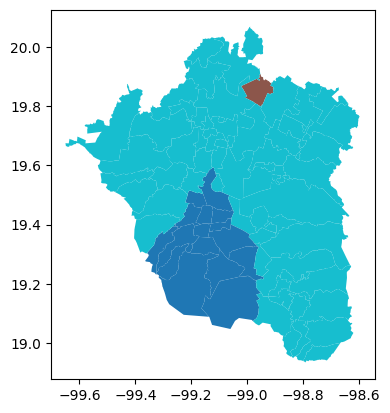

In [66]:
zvm.plot(column="cve_agee")

In [67]:
zvm.crs

<Geographic 2D CRS: EPSG:6365>
Name: Mexico ITRF2008
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich